### How to read Feather Data!

In [308]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [309]:
!pip install pyarrow

In [310]:
all_data = pd.read_feather(r"C:\Users\karan\Desktop\Videos and Materials\Project on Data Analysis\DA Project 4 -  eCommerce\Sales_data.ftr")
all_data.head(6)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,None,None,None,None,None,None
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [311]:
all_data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [312]:
all_data = all_data.dropna(how="all",axis=0)

In [313]:
all_data.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [314]:
all_data[all_data.duplicated()]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
31,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215"
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1302,177795,Apple Airpods Headphones,1,150,04/27/19 19:45,"740 14th St, Seattle, WA 98101"
1684,178158,USB-C Charging Cable,1,11.95,04/28/19 21:13,"197 Center St, San Francisco, CA 94016"
...,...,...,...,...,...,...
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186738,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186782,259296,Apple Airpods Headphones,1,150,09/28/19 16:48,"894 6th St, Dallas, TX 75001"


In [315]:
all_data = all_data.drop_duplicates()

In [316]:
all_data.shape

(185687, 6)

In [317]:
all_data[all_data.duplicated()]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


### Which is the best month for sale?

In [318]:
all_data.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"


In [319]:
all_data["Order Date"][0]

'04/19/19 08:46'

In [320]:
'04/19/19 08:46'.split(" ")

['04/19/19', '08:46']

In [321]:
'04/19/19 08:46'.split(" ")[0].split("/")[0]

'04'

In [322]:
all_data["Order Date"][0].split("/")

['04', '19', '19 08:46']

In [323]:
all_data["Order Date"][0].split("/")[0]

'04'

In [324]:
def return_month(x):
    return x.split("/")[0]

In [325]:
all_data["Month"] = all_data["Order Date"].apply(return_month)

In [326]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month               object
dtype: object

In [327]:
all_data["Month"].unique()

array(['04', '05', 'Order Date', '08', '09', '12', '01', '02', '03', '07',
       '06', '11', '10'], dtype=object)

In [328]:
filter = all_data["Month"]=="Order Date"

In [329]:
all_data = all_data[~filter]

In [330]:
all_data.shape

(185686, 7)

In [331]:
import warnings
from warnings import filterwarnings
filterwarnings("ignore")

In [332]:
all_data["Month"] = all_data["Month"].astype(int)

In [333]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month                int32
dtype: object

In [334]:
all_data["Quantity Ordered"] = all_data["Quantity Ordered"].astype(int)
all_data["Price Each"] = all_data["Price Each"].astype(float)

In [335]:
all_data.dtypes

Order ID             object
Product              object
Quantity Ordered      int32
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int32
dtype: object

In [336]:
all_data["sales"] = all_data["Quantity Ordered"]*all_data["Price Each"]

In [337]:
all_data.groupby(["Month"])["sales"].sum()

Month
1     1821413.16
2     2200078.08
3     2804973.35
4     3389217.98
5     3150616.23
6     2576280.15
7     2646461.32
8     2241083.37
9     2094465.69
10    3734777.86
11    3197875.05
12    4608295.70
Name: sales, dtype: float64

<Axes: xlabel='Month'>

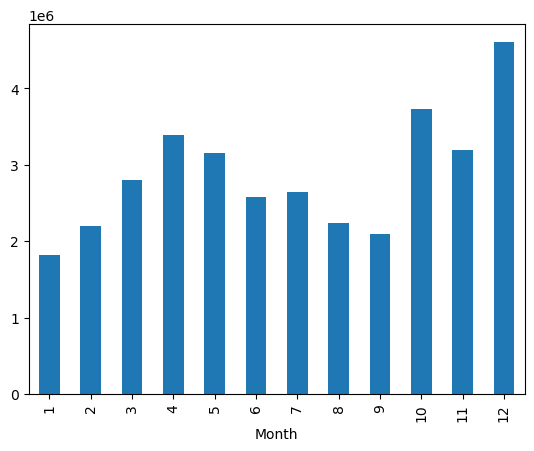

In [338]:
all_data.groupby(["Month"])["sales"].sum().plot(kind="bar")

### Which city has maximum order? 

In [339]:
all_data["Purchase Address"].unique()

array(['917 1st St, Dallas, TX 75001',
       '682 Chestnut St, Boston, MA 02215',
       '669 Spruce St, Los Angeles, CA 90001', ...,
       '981 4th St, New York City, NY 10001',
       '840 Highland St, Los Angeles, CA 90001',
       '220 12th St, San Francisco, CA 94016'], dtype=object)

In [340]:
def City_Name(x):
    return x.split(",")[1]

In [341]:
all_data["City"] = all_data["Purchase Address"].apply(City_Name)

In [342]:
all_data["City"]

0                 Dallas
2                 Boston
3            Los Angeles
4            Los Angeles
5            Los Angeles
               ...      
186845       Los Angeles
186846     San Francisco
186847     San Francisco
186848     San Francisco
186849     San Francisco
Name: City, Length: 185686, dtype: object

###### 1st way

In [343]:
City_Order = all_data.groupby("City")["Order ID"].count().sort_values(ascending=False).reset_index()
City_Order = City_Order.rename(columns={"City":"","Order ID":"city"}).set_index("")

In [344]:
City_Order["city"]


 San Francisco    44662
 Los Angeles      29564
 New York City    24847
 Boston           19901
 Atlanta          14863
 Dallas           14797
 Seattle          14713
 Portland         12449
 Austin            9890
Name: city, dtype: int64

<Axes: ylabel='city'>

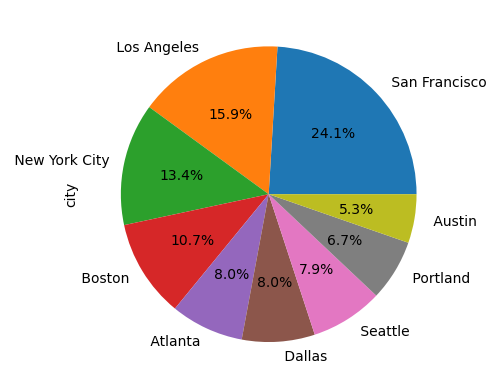

In [345]:
City_Order["city"].plot(kind='pie', labels=City_Order['city'].index, autopct='%1.1f%%')

###### 2nd way

In [346]:
pd.value_counts(all_data["City"])

 San Francisco    44662
 Los Angeles      29564
 New York City    24847
 Boston           19901
 Atlanta          14863
 Dallas           14797
 Seattle          14713
 Portland         12449
 Austin            9890
Name: City, dtype: int64

<Axes: ylabel='City'>

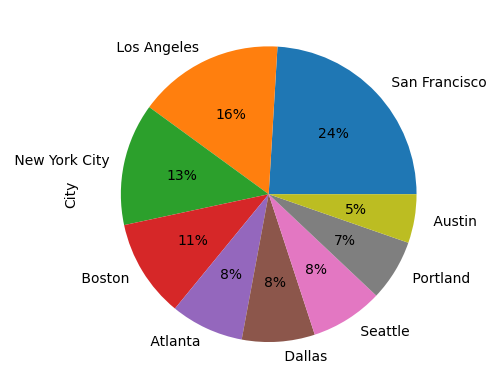

In [347]:
pd.value_counts(all_data["City"]).plot(kind="pie",autopct="%1.0f%%")


# if %1.1f&& then we will get %ages till 1 decimal level

###### 3rd way

Text(0, 0.5, 'City')

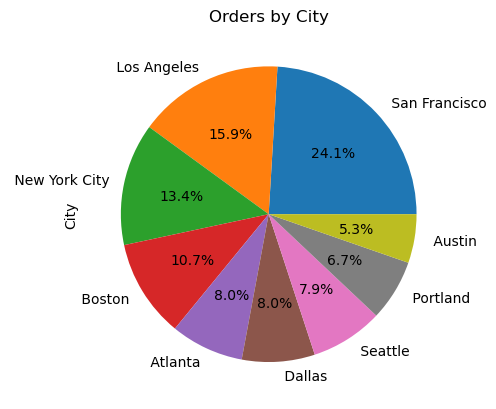

In [348]:
all_data.groupby("City")["Order ID"].count().sort_values(ascending=False).plot(kind="pie", autopct='%1.1f%%')
plt.title('Orders by City')
plt.ylabel('City')

([<matplotlib.patches.Wedge at 0x218daa32810>,
 [Text(0.8006240541475278, 0.7543216316137147, ' San Francisco'),
  Text(-0.46918149273616566, 0.9949214676917286, ' Los Angeles'),
  Text(-1.0759316481444956, 0.22884730394101097, ' New York City'),
  Text(-0.9392052971826266, -0.5726197776396605, ' Boston'),
  Text(-0.46367003201810747, -0.9975019305286218, ' Atlanta'),
  Text(0.07330909091587653, -1.0975544529494143, ' Dallas'),
  Text(0.5898575153947346, -0.9284762310002075, ' Seattle'),
  Text(0.9404817336440612, -0.570520909942713, ' Portland'),
  Text(1.0846367393175007, -0.1832024664754824, ' Austin')],
 [Text(0.43670402953501514, 0.4114481626983898, '24.1%'),
  Text(-0.2559171778560903, 0.542684436922761, '15.9%'),
  Text(-0.5868718080788158, 0.12482580214964233, '13.4%'),
  Text(-0.5122937984632507, -0.31233806053072394, '10.7%'),
  Text(-0.2529109265553313, -0.5440919621065209, '8.0%'),
  Text(0.03998677686320538, -0.598666065245135, '8.0%'),
  Text(0.32174046294258246, -0.50644

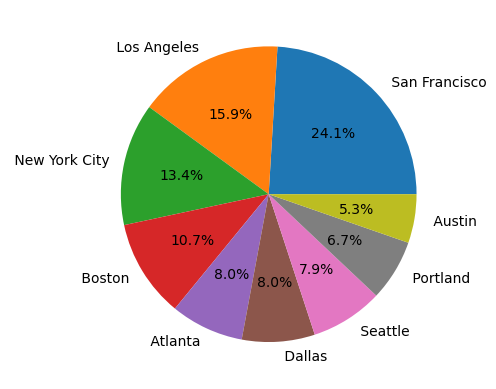

In [349]:
plt.pie(City_Order["city"], labels=City_Order["city"].index, autopct='%1.1f%%')

<Axes: ylabel='city'>

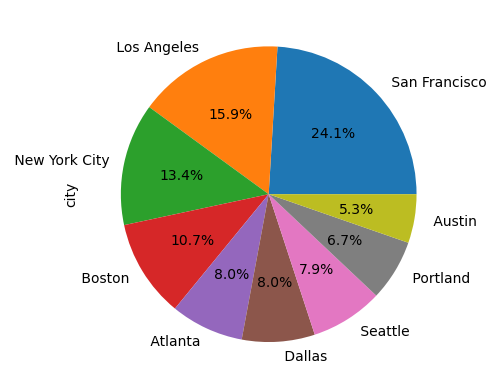

In [351]:
City_Order["city"].plot(kind='pie', autopct='%1.1f%%')

### What product was sold the most & Why?

In [352]:
all_data.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston


###### 1st way

In [353]:
qnt = all_data.groupby("Product")["Quantity Ordered"].sum().reset_index().set_index("Product")
qnt

,Quantity Ordered
Product,
20in Monitor,4126
27in 4K Gaming Monitor,6239
27in FHD Monitor,7541
34in Ultrawide Monitor,6192
AA Batteries (4-pack),27615
AAA Batteries (4-pack),30986
Apple Airpods Headphones,15637
Bose SoundSport Headphones,13430
Flatscreen TV,4813


In [354]:
prz = all_data.groupby("Product")["Price Each"].mean().reset_index().set_index("Product")
prz

,Price Each
Product,
20in Monitor,109.99
27in 4K Gaming Monitor,389.99
27in FHD Monitor,149.99
34in Ultrawide Monitor,379.99
AA Batteries (4-pack),3.84
AAA Batteries (4-pack),2.99
Apple Airpods Headphones,150.00
Bose SoundSport Headphones,99.99
Flatscreen TV,300.00


In [355]:
Dem_Prod = pd.concat([qnt,prz],axis = 1)
Dem_Prod

,Quantity Ordered,Price Each
Product,,
20in Monitor,4126,109.99
27in 4K Gaming Monitor,6239,389.99
27in FHD Monitor,7541,149.99
34in Ultrawide Monitor,6192,379.99
AA Batteries (4-pack),27615,3.84
AAA Batteries (4-pack),30986,2.99
Apple Airpods Headphones,15637,150.00
Bose SoundSport Headphones,13430,99.99
Flatscreen TV,4813,300.00


###### 2nd way

In [356]:
count_df = all_data.groupby("Product").agg({"Quantity Ordered":"sum","Price Each":"mean"})
count_df

,Quantity Ordered,Price Each
Product,,
20in Monitor,4126,109.99
27in 4K Gaming Monitor,6239,389.99
27in FHD Monitor,7541,149.99
34in Ultrawide Monitor,6192,379.99
AA Batteries (4-pack),27615,3.84
AAA Batteries (4-pack),30986,2.99
Apple Airpods Headphones,15637,150.00
Bose SoundSport Headphones,13430,99.99
Flatscreen TV,4813,300.00


In [359]:
products = count_df.index
products

Index(['20in Monitor', '27in 4K Gaming Monitor', '27in FHD Monitor',
       '34in Ultrawide Monitor', 'AA Batteries (4-pack)',
       'AAA Batteries (4-pack)', 'Apple Airpods Headphones',
       'Bose SoundSport Headphones', 'Flatscreen TV', 'Google Phone',
       'LG Dryer', 'LG Washing Machine', 'Lightning Charging Cable',
       'Macbook Pro Laptop', 'ThinkPad Laptop', 'USB-C Charging Cable',
       'Vareebadd Phone', 'Wired Headphones', 'iPhone'],
      dtype='object', name='Product')

Text(0, 0.5, 'Avg. Price of Product')

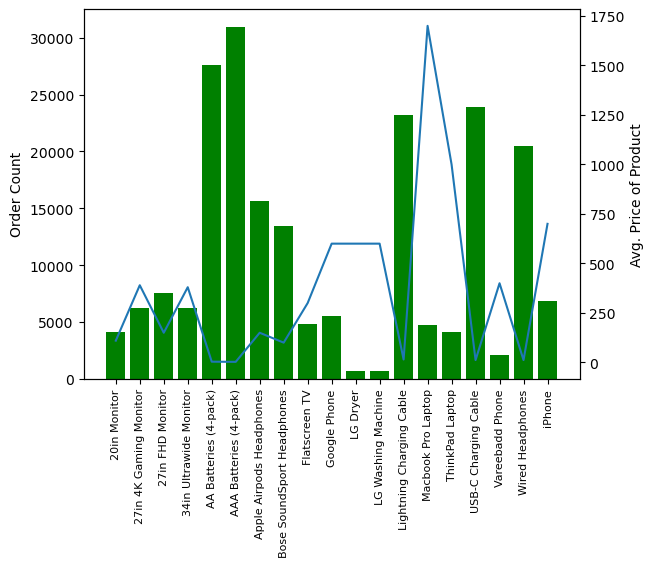

In [360]:
fig , ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.bar(count_df.index,count_df["Quantity Ordered"],color="g")
ax2.plot(count_df.index,count_df["Price Each"])
ax1.set_xticklabels(products,rotation = "vertical",fontsize=8)

ax1.set_ylabel("Order Count")
ax2.set_ylabel("Avg. Price of Product")

### Understanding the Trend of the most sold product !!!
Trend of the sales

In [361]:
all_data["Product"].value_counts()

USB-C Charging Cable          21859
Lightning Charging Cable      21610
AAA Batteries (4-pack)        20612
AA Batteries (4-pack)         20558
Wired Headphones              18849
Apple Airpods Headphones      15525
Bose SoundSport Headphones    13298
27in FHD Monitor               7498
iPhone                         6840
27in 4K Gaming Monitor         6225
34in Ultrawide Monitor         6174
Google Phone                   5522
Flatscreen TV                  4794
Macbook Pro Laptop             4721
ThinkPad Laptop                4126
20in Monitor                   4098
Vareebadd Phone                2065
LG Washing Machine              666
LG Dryer                        646
Name: Product, dtype: int64

In [362]:
most_sold_product = all_data["Product"].value_counts()[0:5].index
most_sold_product
# Top 5 most sold products

Index(['USB-C Charging Cable', 'Lightning Charging Cable',
       'AAA Batteries (4-pack)', 'AA Batteries (4-pack)', 'Wired Headphones'],
      dtype='object')

###### 1st way

In [363]:
x = pd.crosstab(all_data["Month"],all_data["Product"])
x

Product,20in Monitor,27in 4K Gaming Monitor,27in FHD Monitor,34in Ultrawide Monitor,AA Batteries (4-pack),AAA Batteries (4-pack),Apple Airpods Headphones,Bose SoundSport Headphones,Flatscreen TV,Google Phone,LG Dryer,LG Washing Machine,Lightning Charging Cable,Macbook Pro Laptop,ThinkPad Laptop,USB-C Charging Cable,Vareebadd Phone,Wired Headphones,iPhone
Month,,,,,,,,,,,,,,,,,,,
1,215,313,421,313,1037,1084,812,659,244,317,39,42,1069,235,218,1171,125,1004,381
2,245,424,471,415,1274,1320,1009,829,312,379,38,40,1393,276,275,1511,129,1179,438
3,323,478,605,520,1672,1645,1308,1181,358,463,49,64,1749,379,345,1766,174,1512,537
4,387,564,733,650,2062,1988,1507,1277,458,580,78,61,2197,452,390,2074,220,1888,691
5,338,541,688,543,1821,1888,1354,1165,399,479,76,64,1929,463,371,1879,185,1729,640
6,321,451,561,454,1540,1451,1152,969,366,391,43,55,1560,355,314,1531,155,1334,532
7,324,483,601,460,1555,1554,1212,1048,396,410,55,52,1690,368,319,1667,146,1434,501
8,258,437,484,378,1357,1340,998,871,331,359,46,48,1354,298,274,1339,141,1191,439
9,274,380,478,377,1314,1281,961,824,291,341,30,46,1324,287,249,1451,126,1173,396


###### 2nd way

In [364]:
most_sold_product_df = all_data[all_data["Product"].isin(most_sold_product)]

In [365]:
most_sold_product_df.head(4)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016",4,11.95,San Francisco


In [367]:
most_sold_product_df.groupby(["Month","Product"]).size()

Month  Product                 
1      AA Batteries (4-pack)       1037
       AAA Batteries (4-pack)      1084
       Lightning Charging Cable    1069
       USB-C Charging Cable        1171
       Wired Headphones            1004
2      AA Batteries (4-pack)       1274
       AAA Batteries (4-pack)      1320
       Lightning Charging Cable    1393
       USB-C Charging Cable        1511
       Wired Headphones            1179
3      AA Batteries (4-pack)       1672
       AAA Batteries (4-pack)      1645
       Lightning Charging Cable    1749
       USB-C Charging Cable        1766
       Wired Headphones            1512
4      AA Batteries (4-pack)       2062
       AAA Batteries (4-pack)      1988
       Lightning Charging Cable    2197
       USB-C Charging Cable        2074
       Wired Headphones            1888
5      AA Batteries (4-pack)       1821
       AAA Batteries (4-pack)      1888
       Lightning Charging Cable    1929
       USB-C Charging Cable        1879
       W

In [368]:
pivot = most_sold_product_df.groupby(["Month","Product"]).size().unstack()
pivot

Product,AA Batteries (4-pack),AAA Batteries (4-pack),Lightning Charging Cable,USB-C Charging Cable,Wired Headphones
Month,,,,,
1,1037,1084,1069,1171,1004
2,1274,1320,1393,1511,1179
3,1672,1645,1749,1766,1512
4,2062,1988,2197,2074,1888
5,1821,1888,1929,1879,1729
6,1540,1451,1560,1531,1334
7,1555,1554,1690,1667,1434
8,1357,1340,1354,1339,1191
9,1314,1281,1324,1451,1173


<Axes: xlabel='Month'>

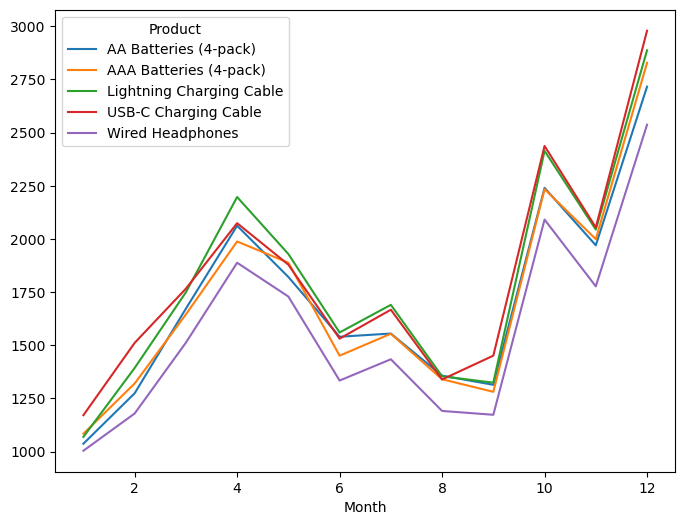

In [369]:
pivot.plot(figsize=(8,6))

### What products are most often sold together? 

In [370]:
all_data.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'Month', 'sales', 'City'],
      dtype='object')

In [371]:
all_data["Order ID"]

0         176558
2         176559
3         176560
4         176560
5         176561
           ...  
186845    259353
186846    259354
186847    259355
186848    259356
186849    259357
Name: Order ID, Length: 185686, dtype: object

In [372]:
filter = all_data["Order ID"].duplicated(keep=False)
filter
# keep=False returns all the duplicates

0         False
2         False
3          True
4          True
5         False
          ...  
186845    False
186846    False
186847    False
186848    False
186849    False
Name: Order ID, Length: 185686, dtype: bool

In [374]:
df_duplicated = all_data[filter]
df_duplicated.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,City
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
18,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles


In [375]:
dup_products = df_duplicated.groupby("Order ID")["Product"].apply(lambda x:",".join(x)).reset_index().rename(columns={"Product":"Grouped_Products"})
dup_products

,Order ID,Grouped_Products
0,141275,"USB-C Charging Cable,Wired Headphones"
1,141290,"Apple Airpods Headphones,AA Batteries (4-pack)"
2,141365,"Vareebadd Phone,Wired Headphones"
3,141384,"Google Phone,USB-C Charging Cable"
4,141450,"Google Phone,Bose SoundSport Headphones"
...,...,...
6874,319536,"Macbook Pro Laptop,Wired Headphones"
6875,319556,"Google Phone,Wired Headphones"
6876,319584,"iPhone,Wired Headphones"
6877,319596,"iPhone,Lightning Charging Cable"


In [376]:
dup_products.shape

(6879, 2)

In [377]:
df_duplicated.shape

(14128, 9)

In [378]:
dup_products_df = df_duplicated.merge(dup_products,how="left",on = "Order ID")
dup_products_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,City,Grouped_Products
0,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,"Google Phone,Wired Headphones"
1,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,"Google Phone,Wired Headphones"
2,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles,"Google Phone,USB-C Charging Cable"
3,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles,"Google Phone,USB-C Charging Cable"
4,176586,AAA Batteries (4-pack),2,2.99,04/10/19 17:00,"365 Center St, San Francisco, CA 94016",4,5.98,San Francisco,"AAA Batteries (4-pack),Google Phone"


In [379]:
no_dup_df = dup_products_df.drop_duplicates(subset=["Order ID"])
no_dup_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,City,Grouped_Products
0,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,"Google Phone,Wired Headphones"
2,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles,"Google Phone,USB-C Charging Cable"
4,176586,AAA Batteries (4-pack),2,2.99,04/10/19 17:00,"365 Center St, San Francisco, CA 94016",4,5.98,San Francisco,"AAA Batteries (4-pack),Google Phone"
6,176672,Lightning Charging Cable,1,14.95,04/12/19 11:07,"778 Maple St, New York City, NY 10001",4,14.95,New York City,"Lightning Charging Cable,USB-C Charging Cable"
8,176681,Apple Airpods Headphones,1,150.00,04/20/19 10:39,"331 Cherry St, Seattle, WA 98101",4,150.00,Seattle,"Apple Airpods Headphones,ThinkPad Laptop"


In [380]:
no_dup_df["Grouped_Products"].value_counts()

iPhone,Lightning Charging Cable                     886
Google Phone,USB-C Charging Cable                   857
iPhone,Wired Headphones                             361
Vareebadd Phone,USB-C Charging Cable                312
Google Phone,Wired Headphones                       303
                                                   ... 
34in Ultrawide Monitor,20in Monitor                   1
Google Phone,Wired Headphones,Macbook Pro Laptop      1
LG Dryer,Vareebadd Phone                              1
20in Monitor,34in Ultrawide Monitor                   1
LG Washing Machine,AA Batteries (4-pack)              1
Name: Grouped_Products, Length: 350, dtype: int64

In [385]:
product = no_dup_df["Grouped_Products"].value_counts().index

<Axes: >

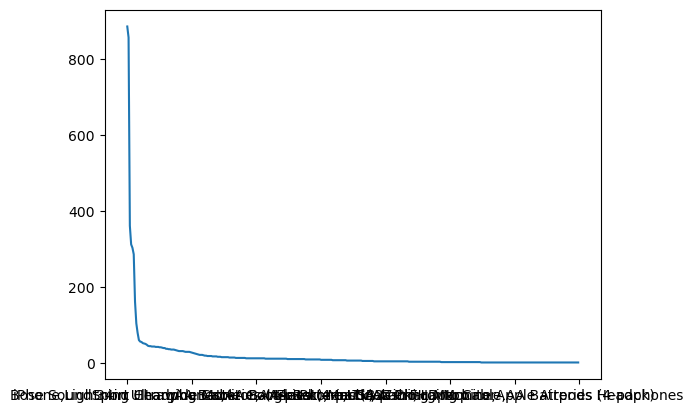

In [390]:
no_dup_df["Grouped_Products"].value_counts().plot()


<Axes: ylabel='Grouped_Products'>

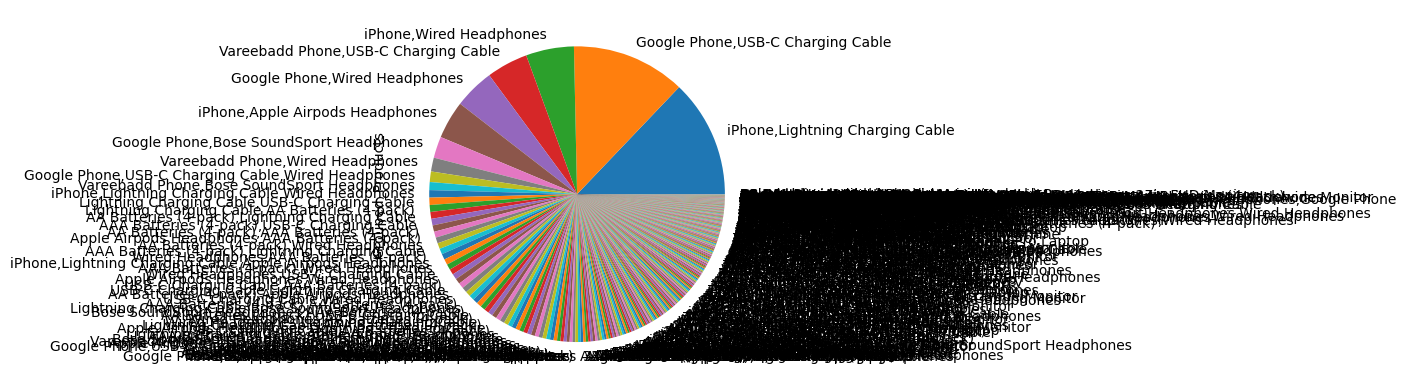

In [382]:
no_dup_df["Grouped_Products"].value_counts().plot(kind="pie")

<Axes: ylabel='Grouped_Products'>

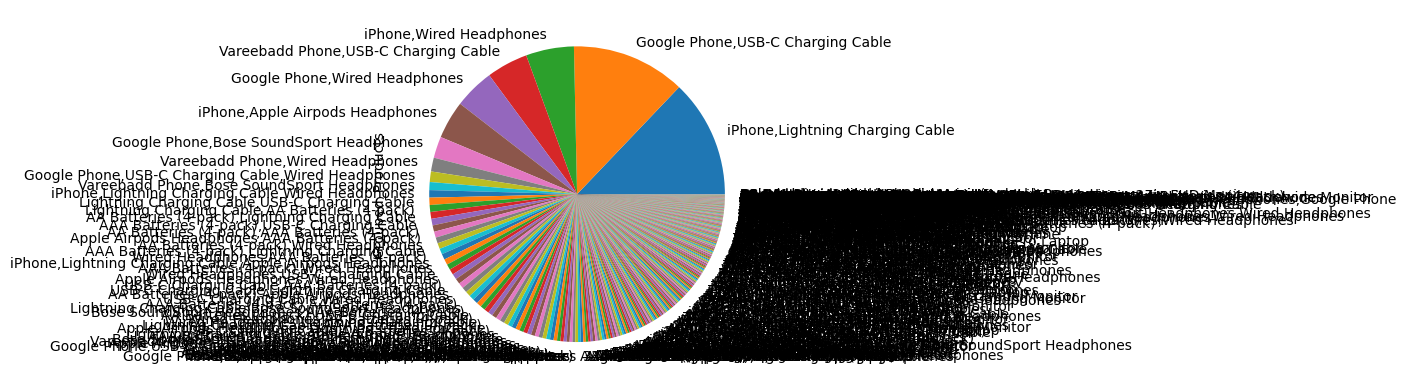

In [383]:
no_dup_df["Grouped_Products"].value_counts().plot.pie()

<Axes: ylabel='Grouped_Products'>

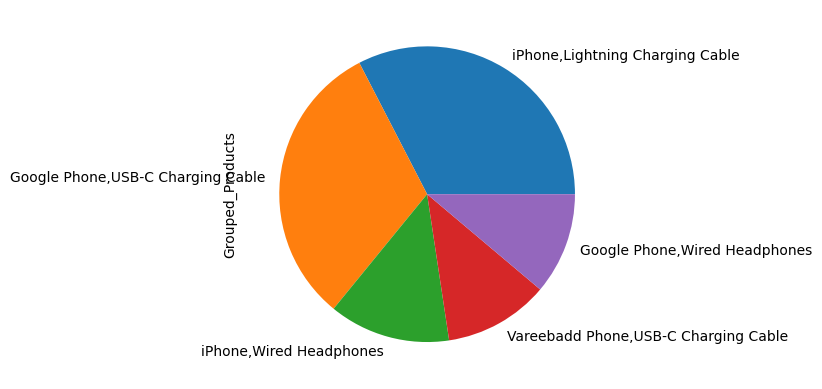

In [384]:
no_dup_df["Grouped_Products"].value_counts()[0:5].plot.pie()